In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.model_selection as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

In [90]:
original_data= pd.read_csv('adult_dataset_training.csv')

In [91]:
original_data.head()

Unnamed: 0  age workclass  fnlwgt   education  educational-num  \
0       31455   27   Private  157612   Bachelors               13   
1       38329   31   Private  301637   Assoc-voc               11   
2       42271   31   Private  163003  Assoc-acdm               12   
3        5238   63   Private  210350     5th-6th                3   
4       35492   17   Private  148522        11th                7   

       marital-status         occupation    relationship                race  \
0       Never-married     Prof-specialty   Not-in-family               White   
1       Never-married    Farming-fishing       Own-child               White   
2       Never-married     Prof-specialty  Other-relative  Asian-Pac-Islander   
3  Married-civ-spouse  Machine-op-inspct         Husband               Other   
4       Never-married      Other-service       Own-child               White   

   gender  capital-gain  capital-loss  hours-per-week native-country income  
0  Female             0             0              55  United-States  <=50K  
1    Male             0             0              40  United-States  <=50K  
2  Female             0             0              40    Philippines  <=50K  
3    Male             0             0              32         Mexico  <=50K  
4    Male             0          1721              15  United-States  <=50K

In [92]:
#original_data = original_data.set_index(original_data.columns[0])

In [93]:
to_drop = [
    'age',
    'gender',
    'race'
]

original_data = original_data.drop(to_drop, axis=1)

In [95]:
def binarise_features(df):
    result = df.copy()
    binarisers = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            if len(result[column].unique()) >2 :
                binarisers[column] = preprocessing.LabelBinarizer()
                result = result.join(pd.DataFrame(binarisers[column].fit_transform(result[column]), columns=binarisers[column].classes_), lsuffix=column)
                result = result.drop(column, axis=1)
    return result, binarisers

In [96]:
#binarise features with more than 2 unique values
binarise_data, binarisers = binarise_features(original_data)

In [98]:
binarise_data.head()

Unnamed: 0  fnlwgt  educational-num  capital-gain  capital-loss  \
0       31455  157612               13             0             0   
1       38329  301637               11             0             0   
2       42271  163003               12             0             0   
3        5238  210350                3             0             0   
4       35492  148522                7             0          1721   

   hours-per-week income  ?occupation  Federal-gov  Local-gov  ...  Portugal  \
0              55  <=50K            0            0          0  ...         0   
1              40  <=50K            0            0          0  ...         0   
2              40  <=50K            0            0          0  ...         0   
3              32  <=50K            0            0          0  ...         0   
4              15  <=50K            0            0          0  ...         0   

   Puerto-Rico  Scotland  South  Taiwan  Thailand  Trinadad&Tobago  \
0            0         0      0       0         0                0   
1            0         0      0       0         0                0   
2            0         0      0       0         0                0   
3            0         0      0       0         0                0   
4            0         0      0       0         0                0   

   United-States  Vietnam  Yugoslavia  
0              1        0           0  
1              1        0           0  
2              0        0           0  
3              0        0           0  
4              1        0           0  

[5 rows x 102 columns]

In [99]:
#Fucntion to encode the categorical data
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [100]:
#Encode categorical data like marital status, occupation and relationship as integers
encoded_data, encoders = number_encode_features(binarise_data)

In [102]:
encoded_data.head()

Unnamed: 0  fnlwgt  educational-num  capital-gain  capital-loss  \
0       31455  157612               13             0             0   
1       38329  301637               11             0             0   
2       42271  163003               12             0             0   
3        5238  210350                3             0             0   
4       35492  148522                7             0          1721   

   hours-per-week  income  ?occupation  Federal-gov  Local-gov  ...  Portugal  \
0              55       0            0            0          0  ...         0   
1              40       0            0            0          0  ...         0   
2              40       0            0            0          0  ...         0   
3              32       0            0            0          0  ...         0   
4              15       0            0            0          0  ...         0   

   Puerto-Rico  Scotland  South  Taiwan  Thailand  Trinadad&Tobago  \
0            0         0      0       0         0                0   
1            0         0      0       0         0                0   
2            0         0      0       0         0                0   
3            0         0      0       0         0                0   
4            0         0      0       0         0                0   

   United-States  Vietnam  Yugoslavia  
0              1        0           0  
1              1        0           0  
2              0        0           0  
3              0        0           0  
4              1        0           0  

[5 rows x 102 columns]

In [22]:
#Train-validation split
X_train, X_test, y_train, y_test = train_test_split(encoded_data.iloc[:, :-1], encoded_data["income"], train_size=0.8)

c:\pycode\pythonbook2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
y_train.mean()

0.23990658391451788

In [24]:
#scaling feature variables
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype(np.float64)), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test.astype(np.float64)), columns=X_test.columns)

In [25]:
X_test.head()

age  workclass    fnlwgt  education  educational-num  marital-status  \
0 -0.702110   0.087870  0.427787   1.221850        -0.031820       -0.416678   
1 -1.432131   0.087870  0.308872   1.221850        -0.031820        0.912286   
2 -0.994119   0.087870 -0.281423   1.221850        -0.031820        0.912286   
3  0.465924  -1.286133  1.278124   0.443654         1.525917       -0.416678   
4  0.757932   0.087870 -1.475747   1.221850        -0.031820       -0.416678   

   occupation  relationship      race    gender  capital-gain  capital-loss  \
0    1.277010     -0.900143  0.394208  0.703123     -0.144457     -0.217864   
1   -1.319741      0.972265  0.394208 -1.422225     -0.144457     -0.217864   
2   -0.611536      0.972265 -3.154118  0.703123     -0.144457     -0.217864   
3    0.804874     -0.900143  0.394208  0.703123      0.903556     -0.217864   
4    1.749147     -0.900143  0.394208  0.703123     -0.144457     -0.217864   

   hours-per-week  native-country  
0        0.777837        0.288736  
1       -2.473723        0.288736  
2       -0.035053       -4.341149  
3       -0.035053        0.288736  
4       -0.035053        0.288736

F1 score: 0.545870


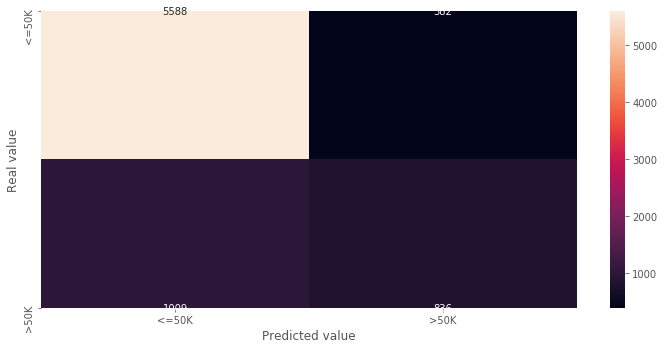

In [36]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))

In [26]:
from sklearn import tree

F1 score: 0.601803


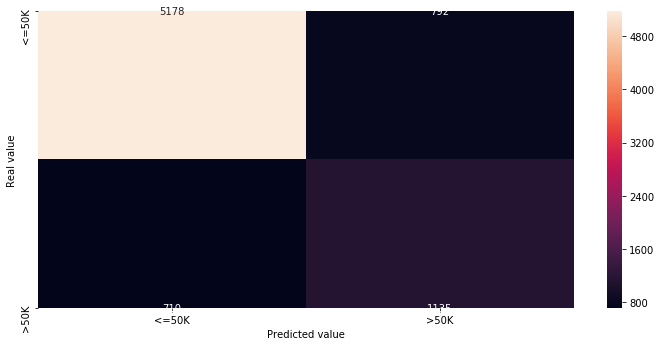

In [28]:
clf= tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))


In [30]:
from sklearn.ensemble import RandomForestClassifier

F1 score: 0.647939


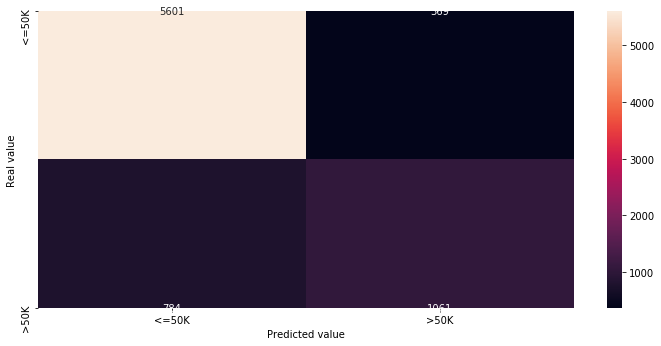

In [32]:
clt = RandomForestClassifier(n_estimators=10, max_depth=None,random_state=0)
clt.fit(X_train, y_train)
y_pred = clt.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))

In [33]:
from fairml import audit_model
from fairml import plot_dependencies

Feature: age,	 Importance: -0.08982725527831094
Feature: workclass,	 Importance: -0.037747920665387076
Feature: fnlwgt,	 Importance: 0.06807421625079975
Feature: education,	 Importance: 0.06269993602047345
Feature: educational-num,	 Importance: 0.11183621241202815
Feature: marital-status,	 Importance: -0.10019193857965451
Feature: occupation,	 Importance: -0.09865642994241842
Feature: relationship,	 Importance: -0.11721049264235445
Feature: race,	 Importance: 0.01471529110684581
Feature: gender,	 Importance: -0.11861804222648753
Feature: capital-gain,	 Importance: 0.04452975047984645
Feature: capital-loss,	 Importance: 0.02034548944337812
Feature: hours-per-week,	 Importance: 0.06436340371081253
Feature: native-country,	 Importance: -0.023416506717850286


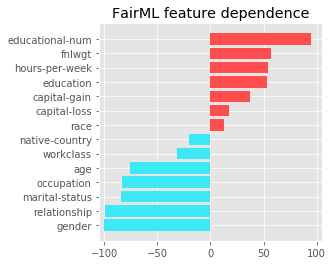

In [34]:
#  call audit model with model
total, _ = audit_model(clt.predict, X_test)

# print feature importance
print(total)

# generate feature dependence plot
fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence"
)
plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight')

Feature: age,	 Importance: 0.07690339091490724
Feature: workclass,	 Importance: -0.025335892514395393
Feature: fnlwgt,	 Importance: 0.003198976327575176
Feature: education,	 Importance: 0.03147792706333973
Feature: educational-num,	 Importance: 0.12412028150991683
Feature: marital-status,	 Importance: -0.06461932181701856
Feature: occupation,	 Importance: 0.02507997440818938
Feature: relationship,	 Importance: -0.09968010236724248
Feature: race,	 Importance: 0.019577735124760076
Feature: gender,	 Importance: 0.08841970569417787
Feature: capital-gain,	 Importance: 0.08253358925143954
Feature: capital-loss,	 Importance: 0.023160588611644273
Feature: hours-per-week,	 Importance: 0.07152911068458094
Feature: native-country,	 Importance: 0.0025591810620601407


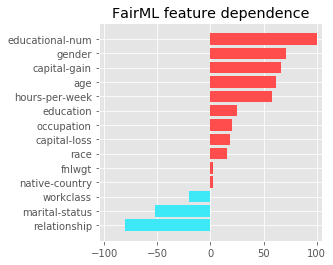

In [37]:
#  call audit model with model
total, _ = audit_model(cls.predict, X_test)

# print feature importance
print(total)

# generate feature dependence plot
fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence"
)
plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight')

In [49]:
type(total)

fairml.orthogonal_projection.AuditResult